In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')

In [16]:
full = cv2.imread('D:\Dev\OpenCV\images\cat_outside.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

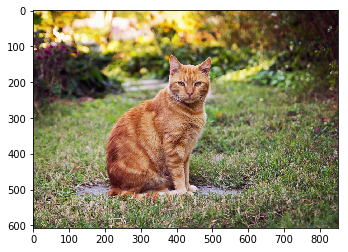

In [17]:
plt.imshow(full)

In [18]:
face = cv2.imread('D:\Dev\OpenCV\images\cat_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

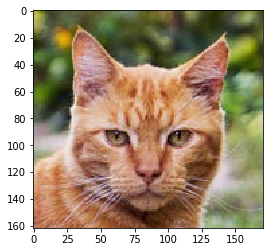

In [19]:
plt.imshow(face)

In [20]:
face.shape

(162, 171, 3)

In [21]:
full.shape

(607, 850, 3)

In [22]:
# ALL the 6 methods for comparison in a list
# Note how we are using string, later on we will use the eval() function to convert to function

method = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED',
          'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

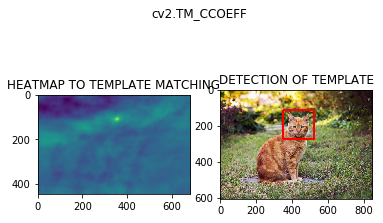

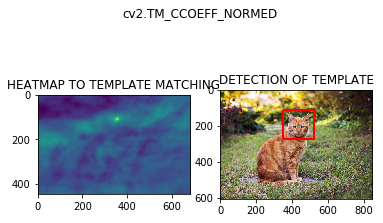

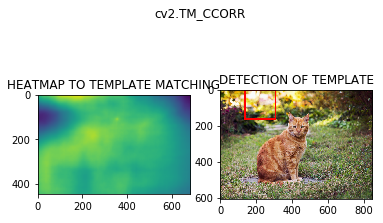

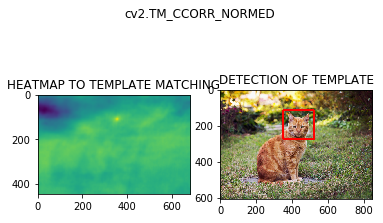

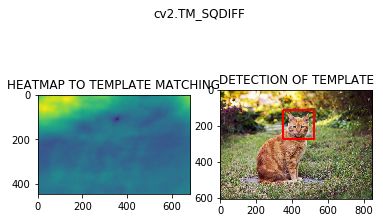

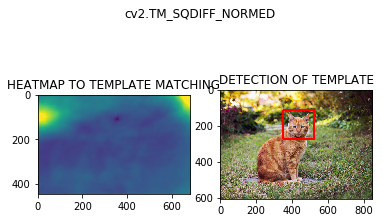

In [23]:
for m in method:
    # CREATE A COPY
    full_copy = full.copy()
    
    method = eval(m)
    
    # TEMPLATE MATCHING
    res = cv2.matchTemplate(full_copy, face, method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc  # (x, y)
    else:
        top_left = max_loc
        
    height, width, chanel = face.shape
    bottom_right = (top_left[0]+width, top_left[1]+height)
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 7)
    
    # PLOT AND SHOW THE IMAGES
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP TO TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # TITLE WITH THE METHOD USED
    plt.suptitle(m)
    plt.show()
    
    print('\n')